<a href="https://colab.research.google.com/github/oliviachchoi/SDproject-bike-/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%84%A4%EB%AA%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#주제선정


시간대별 따릉이 대여 수 예측

시간이 난다면 각 구, 또는 특정 구(ex.서초구)의 각 거치대의 따릉이 대여 건수를 예측 하고자 한다.



#Used Dataset

#1. 따릉이 이용정보 = 시간대별

http://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do# 

 서울시 공공자전거 이용 정보( 시간대별)

2020.01 부터 2020.12월 까지의 데이터를 활용하였고,

이 데이터를 활용해서 시간별 대여 건수를 확인 하고자 한다.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df1_5=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_19.12_20.056.csv',encoding='cp949')
df_6=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.06.csv',encoding='cp949')
df_7=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.07.csv',encoding='cp949')
df_8=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.08.csv',encoding='cp949')
df_9=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.09.csv',encoding='cp949')
df_10=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.10.csv',encoding='cp949')
df_11=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.11.csv',encoding='cp949')
df_12=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.12.csv',encoding='cp949')

In [ ]:
#concat이 error나서 append로 데이터 병합시킴
df=df1_5.append(df_6)
df=df.append(df_7)
df=df.append(df_8)
df=df.append(df_9)
df=df.append(df_10)
df=df.append(df_11)
df=df.append(df_12)

In [ ]:
df1_5.shape[0]+df_6.shape[0]+df_7.shape[0]+df_8.shape[0]+df_9.shape[0]+df_10.shape[0]+df_11.shape[0]+df_12.shape[0]

19802991

In [ ]:
df.shape
#shape이 맞는 걸 보니 잘 병합 되어 보인다.

(19802991, 12)

In [ ]:
#대여일자 to_datetime으로 바꿔서 넣어주기 strftime
from datetime import datetime

df['대여일자']=pd.to_datetime(df['대여일자'])

In [ ]:
df['year']=df['대여일자'].dt.year
df['month']=df['대여일자'].dt.month
df['day']=df['대여일자'].dt.day

In [ ]:
#2019년 데이터 지우기
df=df[df.year!=2019]

In [ ]:
#rename columns
df= df.rename(columns={'대여일자':'date','대여시간':'time','대여소번호':'stno','대여소명':'stname','대여구분코드':'code','성별':'sex','연령대코드':'age','이용건수':'borrowednum',
                       '운동량':'exercise','탄소량':'co','이동거리':'dist','사용시간':'usedtime'})

In [ ]:
df.drop('date',axis=1, inplace=True)

In [ ]:
df

,time,stno,stname,code,sex,age,borrowednum,exercise,co,dist,usedtime,year,month,day
776956,0,1044,1044. 굽은다리역,정기권,NaN,~10대,1,33.96,0.30,1280.00,6,2020,1,1
776957,0,1656,1656. 중앙하이츠 아파트 입구,정기권,NaN,~10대,1,40.15,0.39,1690.00,6,2020,1,1
776958,0,1337,1337. 돈암성당 옆,정기권,NaN,~10대,1,80.88,0.50,2150.00,12,2020,1,1
776959,0,1984,1984. 구로구청,정기권,NaN,~10대,1,47.36,0.43,1840.00,25,2020,1,1
776960,0,2601,2601. 석촌호수 서호사거리,정기권,NaN,~10대,1,29.34,0.26,1140.00,5,2020,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066896,23,3121,3121.가좌삼거리,일일권,M,30대,1,0.00,0.00,0.00,13,2020,12,31
1066897,23,560,560. 비전교회 앞,일일권,M,30대,1,0.00,0.00,0.00,52,2020,12,31
1066898,23,1416,1416. 상봉역 3번출구,일일권,M,30대,1,18.33,0.17,711.99,4,2020,12,31
1066899,23,1625,1625. 상계역(4번출구),일일권,M,50대,1,20.52,0.15,647.86,7,2020,12,31


#2. 미세먼지 데이터
http://data.seoul.go.kr/dataList/OA-15526/S/1/datasetView.do 

.http://data.seoul.go.kr/dataList/OA-15516/S/1/datasetView.do 

2020년 데이터 활용

각 구마다 시간대별로 미세먼지와 초미세먼지의 농도를 추출해서 사용 할 예정이다

미세먼지와 초미세먼지가 자전거의 대여량에 영향을 미치는지 알아보기 위해서 이 데이터도 추가로 불러왔다.



In [ ]:
dust1=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202001.csv',encoding='cp949')
dust2=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202002.csv',encoding='cp949')
dust3=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202003.csv',encoding='cp949')
dust4=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202004.csv',encoding='cp949')
dust5=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202005.csv',encoding='cp949')
dust6=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202006.csv',encoding='cp949')
dust7=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202007.csv',encoding='cp949')
dust8=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202008.csv',encoding='cp949')
dust9=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202009.csv',encoding='cp949')
dust10=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202010.csv',encoding='cp949')
dust11=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202011.csv',encoding='cp949')
dust12=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202012.csv',encoding='cp949')

dust_info=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/서울특별시 대기오염 측정소 정보.csv',encoding='cp949')

In [ ]:
dust1.head()
#pm10(미세먼지): 측정항목코드:8, 측정단위 ㎍/㎥
#pm2.5(초미세먼지): 측정항목코드:9, 측정단위 

,측정일시,측정소 코드,측정항목 코드,평균값,측정기 상태,국가 기준초과 구분,지자체 기준초과 구분,저장일시
0,20200131230000,117,1,0.005,0,0,0,20200131235849
1,20200131230000,104,9,35.000,0,0,0,20200201000015
2,20200131230000,104,8,47.000,0,0,0,20200201000015
3,20200131230000,101,3,0.048,0,0,0,20200201000015
4,20200131230000,101,1,0.003,0,0,0,20200201000015


In [ ]:
#데이터 병합 후 
#미세먼지, 초미세먼지만 추출
#측정소 코드에 대한 설명이 있는 file과 merge 시켜서 구별 데이터 얻을 수 있게끔 함
dust_info.head()

,측정소 코드,측정소 이름,측정소 주소,표시 순서,공인코드
0,101,종로구,서울 종로구 종로35가길 19 종로56가 동 주민센터,1,111123
1,102,중구,서울 중구 덕수궁길 15 시청서소문별관 3동,2,111121
2,103,용산구,서울 용산구 한남대로 136 서울특별시중부기술교육원,3,111131
3,104,은평구,서울 은평구 진흥로 215 (한국환경산업기술원 온실동2층 ),4,111181
4,105,서대문구,서울 서대문구 세검정로4길 32(홍제3동 주민센터),5,111191


#3. 따릉이 대여소 정보

http://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do

따릉이의 지도상 위치(latitude, longitude), 대여소명, 대여소 번호등의 변수가 있고,

대여소 번호를 활용해서 위의 1번 자료와 merge 해서 사용 할 예정이다.


In [ ]:
bike_station = pd.read_csv('/content/drive/MyDrive/따릉이 project/공공자전거 대여소 정보(21.01.31 기준).csv',encoding='cp949',skiprows=5,header=None)

In [ ]:
bike_station.head()

,0,1,2,3,4,5,6,7,8,9
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [ ]:
#컬럼 명 지정해주기
bike_station= bike_station.rename(columns= {0: 'stno', 1: 'stname',2: 'place',3:'detailedplace',4:'Lat',5:'Long',6:'Time',7:'LCD',8:'QR',9:'method'})

In [ ]:
bike_station.head()

,stno,stname,place,detailedplace,Lat,Long,Time,LCD,QR,method
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


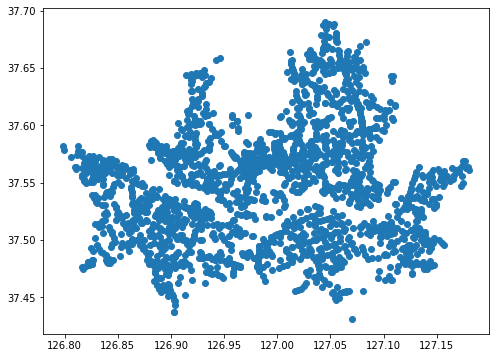

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(bike_station.Long, bike_station.Lat)

#4. 서초구 날씨 데이터
http://data.seoul.go.kr/dataList/OA-13252/F/1/datasetView.do

2020년 데이터를 활용하였고,

각 구마다 시간대별로 [습도, 강수, 기온, 풍속]을 알 수 있다.


﻿
만약 각 구, 또는 각 구의 거치대의 대여 건수를 활용 한다면 구별 데이터를 사용 할 것이고

그냥 시간대별 예측을 한다면 서울시 시간당 평균 [습도, 강수, 기온, 풍속]의 데이터를 적용 할 예정이다.

﻿

﻿
다음주 까지

하나의 데이터 셋으로 병합하여서 분석 할 수 있게 가공을 할 것이며,

데이터를 뜯어서 EDA를 할 예정이다.

﻿